In [3]:
#Lucas Ross 6 Jan 2023

#import things
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#you dont have to use plt.show() to display graph :)
%matplotlib inline

In [4]:
#import file
auto = pd.read_csv("automobile.csv")

In [5]:
#eda
print(auto.head(5)) #first 5 rows
print(auto.shape) #dimensions
print(auto.describe(include="all").T) #statistical metrics (transposed)
#use include="all" because some statistics cant be shown bc some columns are objects (i.e. strings)
print(auto.info()) #all columns and their data types

#you can say df.T to any dataframe df to transpose it :0s

   symboling  normalized_losses         make fuel_type aspiration  \
0          3                168  alfa-romero       gas        std   
1          3                168  alfa-romero       gas        std   
2          1                168  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  number_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0             two  convertible          rwd           front        88.6  ...   
1             two  convertible          rwd           front        88.6  ...   
2             two    hatchback          rwd           front        94.5  ...   
3            four        sedan          fwd           front        99.8  ...   
4            four        sedan          4wd           front        99.4  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3

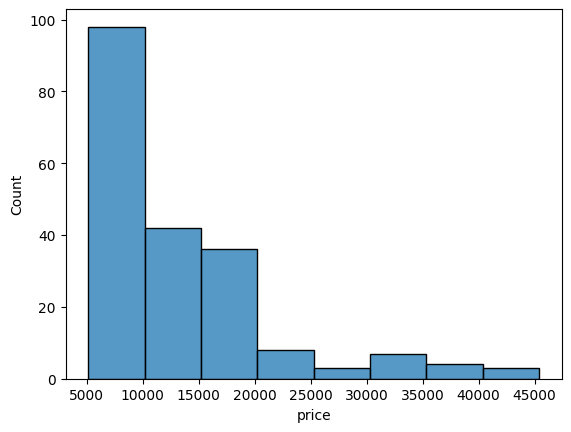

In [6]:
#histogram with seaborn (univariate graph)
sns.histplot(data=auto, x="price", bins=8); #if you use a semicolon, the memory address wont display

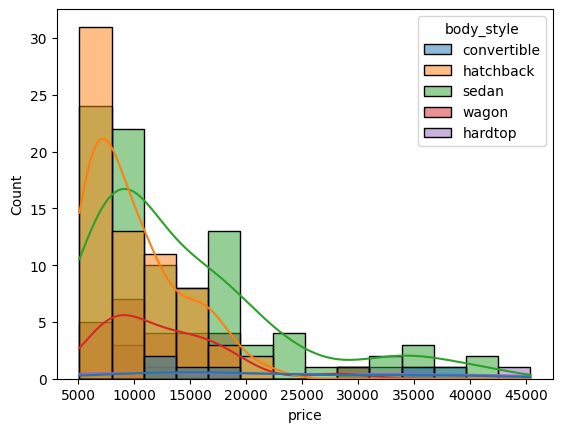

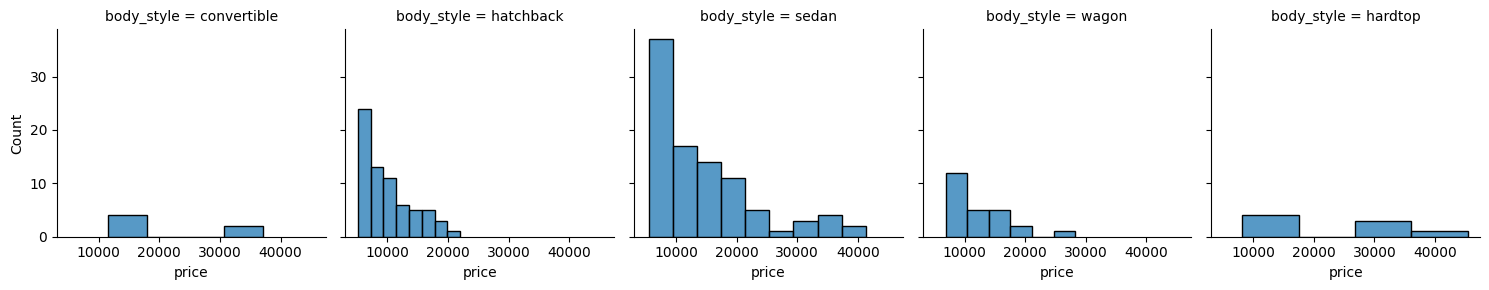

In [7]:
#kde = Kernel Density Estimation (distribution curve)
sns.histplot(data=auto, x="price", hue="body_style", kde=True); #hue = categorical variable

#but this is hard to read
grid = sns.FacetGrid(auto, col="body_style") #makes a grid with each graph corresponding to a value of body_style
grid.map(sns.histplot, "price")

<AxesSubplot:xlabel='body_style', ylabel='price'>

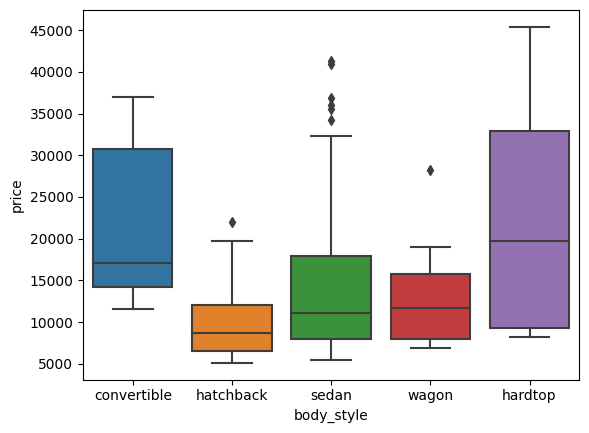

In [8]:
sns.boxplot(data=auto, x="body_style", y="price") #bivariate graph
#cannot show multimodality (multiple peaks) and clusters

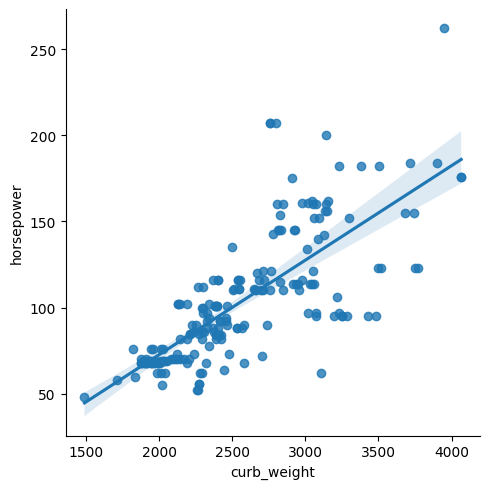

In [9]:
#linear (regression) model plot
sns.lmplot(data=auto, x="curb_weight", y="horsepower")
#fits with confidence interval (shaded area)

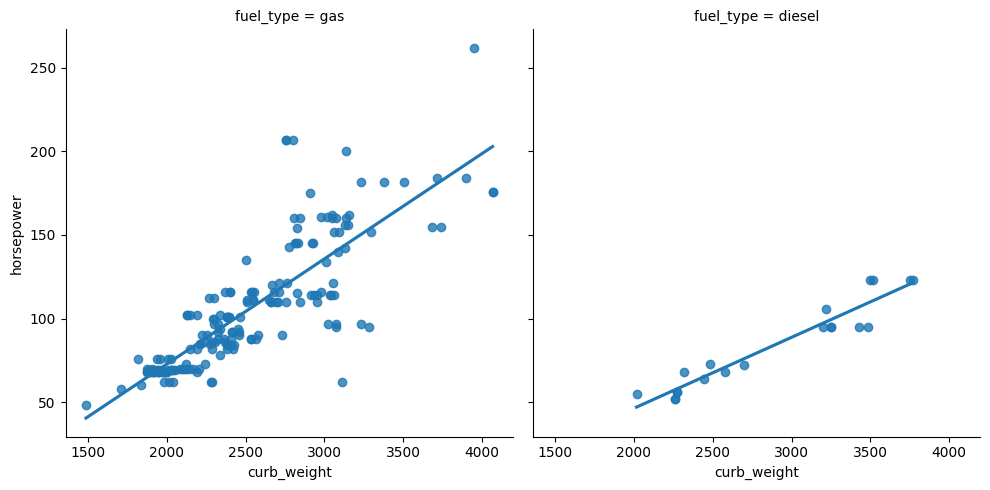

In [10]:
#col is like hue, but instead of altering colors on the same graph, it makes two graphs
sns.lmplot(data=auto, x="curb_weight", y="horsepower", col="fuel_type", ci=False) #ci=False disables confidence interval

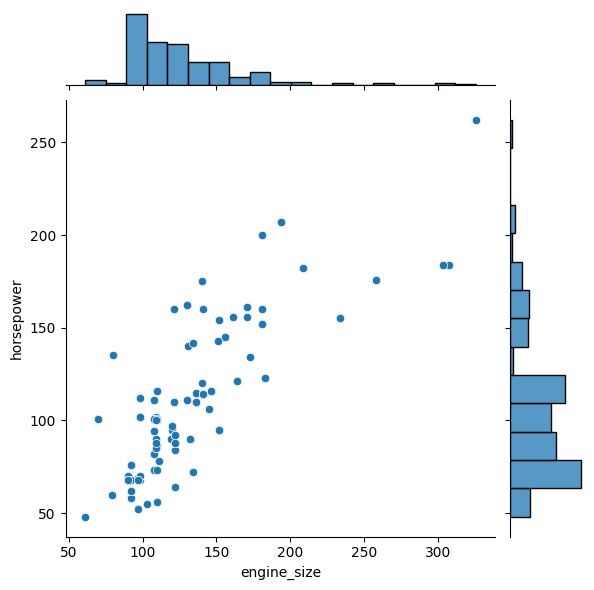

In [11]:
#joint plot --> histogram (without axes) + scatter plot (with axes)
sns.jointplot(data=auto, x="engine_size", y="horsepower")

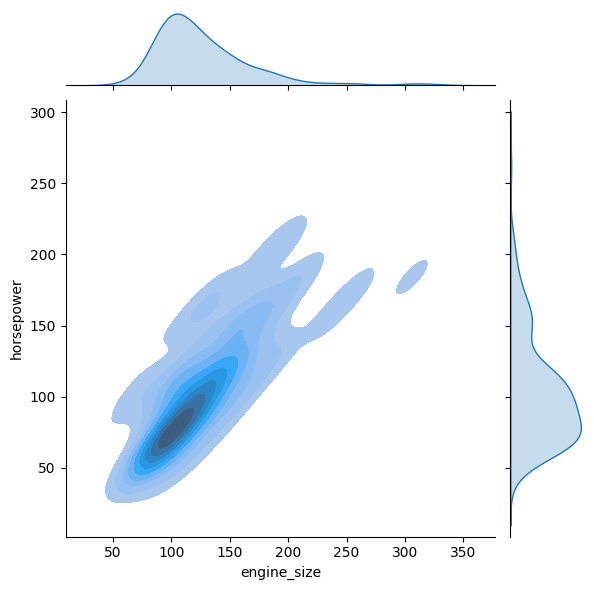

In [12]:
sns.jointplot(data=auto, x="engine_size", y="horsepower", kind="kde", fill=True) #kde is like a heatmap

<AxesSubplot:xlabel='horsepower'>

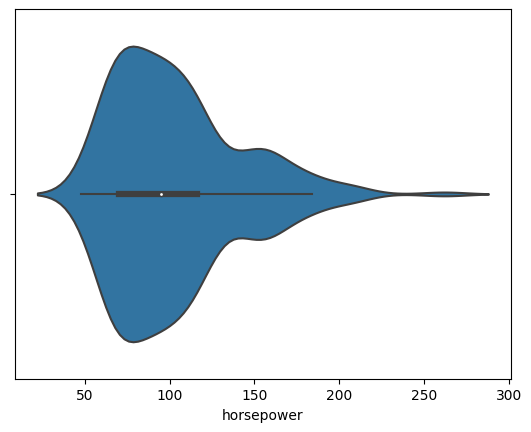

In [15]:
#violin plot
sns.violinplot(data=auto, x="horsepower")

<AxesSubplot:xlabel='body_style', ylabel='engine_size'>

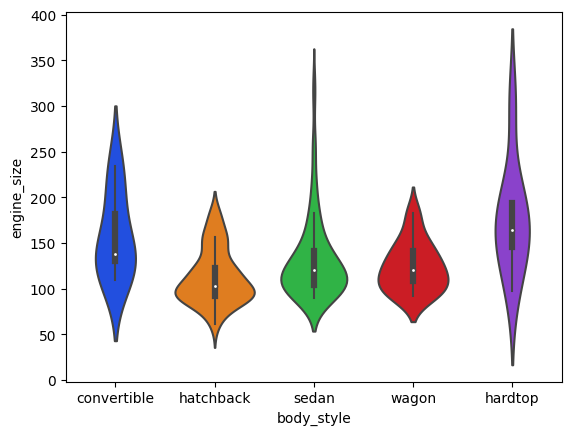

In [16]:
#violin plot
sns.violinplot(data=auto, x="body_style", y="engine_size", palette="bright") #by default orient="v", vioins will be up

<AxesSubplot:xlabel='fuel_type', ylabel='engine_size'>

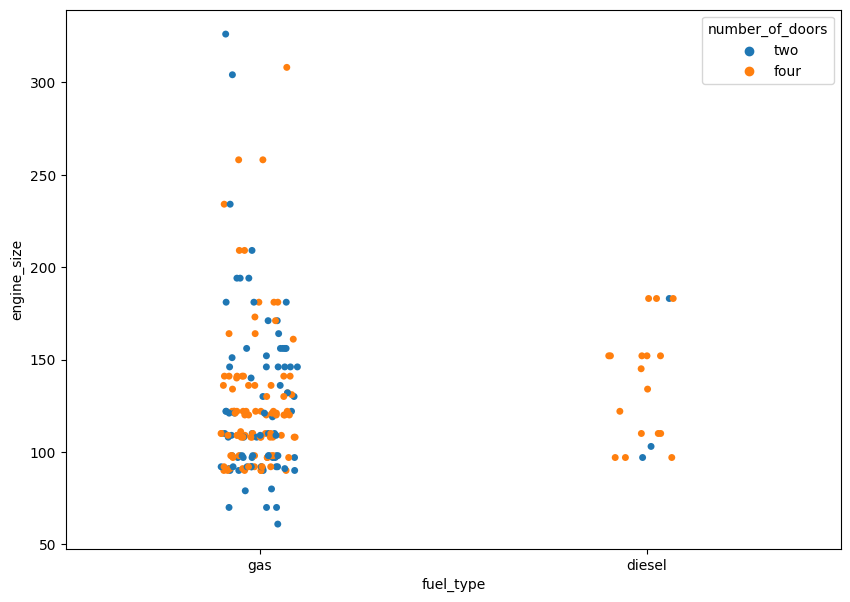

In [20]:
plt.figure(figsize=(10,7)) #set rows/cols
#strip plot
sns.stripplot(data=auto, x="fuel_type", y="engine_size", hue="number_of_doors", jitter=True)
#jitter=True puts points horizontally so that density can be determined easily

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

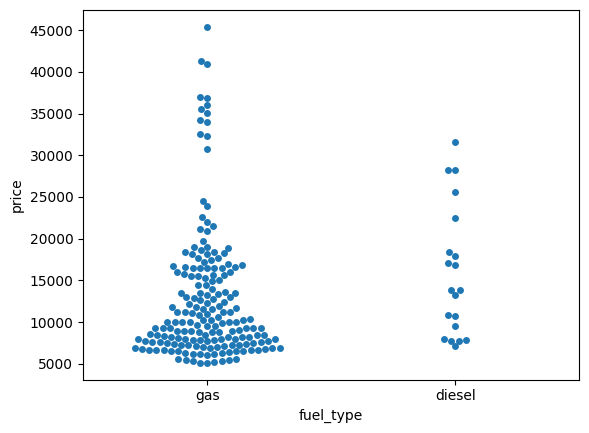

In [27]:
#swarm plot
sns.swarmplot(data=auto, x="fuel_type", y="price")
#like strip plot, but no overlap so density is easy to see

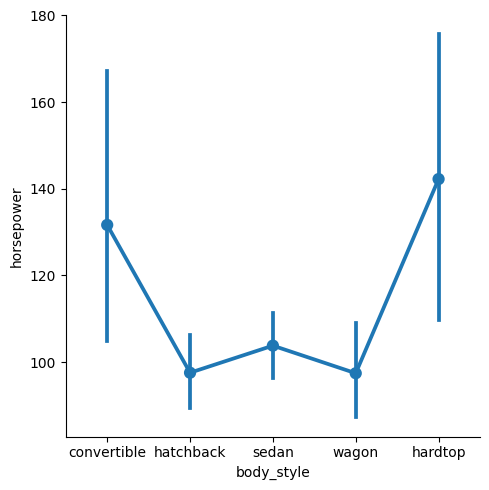

In [30]:
#cat plot
sns.catplot(data=auto, x="body_style", y="horsepower", kind="point")
#plots min/max values, points = averages

<AxesSubplot:>

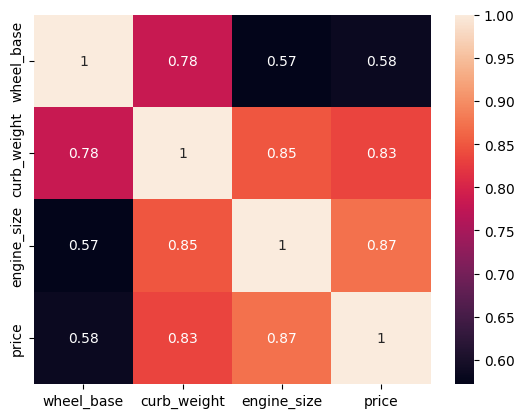

In [32]:
#heat map
sns.heatmap(data=auto[["wheel_base", "curb_weight", "engine_size", "price"]].corr(), annot=True) #gets correlation of 4 variables
#annot=True shows values on each grid cell

In [33]:
#plotly is an open-source py graphing library for beautiful and INTERACTIVE data visualizations
import plotly.express as px

In [34]:
#plotly histogram
his = px.histogram(auto, x="price")
his.show()

In [35]:
#plotly bar graph
bar = px.bar(auto, x="peak_rpm", y="horsepower")
bar.show()

In [37]:
#3d scatter plot
fig3d = px.scatter_3d(auto, x="peak_rpm", y="horsepower", z="price")
fig3d.show()